<a href="https://colab.research.google.com/github/adsayyed/MIS285N/blob/main/Web_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 7 
#### Extracting mouse images from google, and labeling them: gaming mouse and rodent mouse. This demonstrates our ability to clasify images. 

In [28]:
from google.colab import files, drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [29]:
from fastai.vision import *

In [37]:
folder = 'computer_mouse'
file = 'computer_mouse.txt'

In [38]:
path = Path('/content/Mouse') 
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [40]:
download_images(path/file, dest, max_pics=200)

In [41]:
folder = 'rodent_mouse'
file = 'rodent_mouse.txt'

In [42]:
path = Path('/content/Mouse') 
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [43]:
download_images(path/file, dest, max_pics=200)

In [44]:
path.ls()

[PosixPath('/content/Mouse/computer_mouse'),
 PosixPath('/content/Mouse/computer_mouse.txt'),
 PosixPath('/content/Mouse/.ipynb_checkpoints'),
 PosixPath('/content/Mouse/rodent_mouse'),
 PosixPath('/content/Mouse/rodent_mouse.txt')]

In [45]:
classes = ['computer_mouse','rodent_mouse']

In [ ]:
#download_images(path/file, dest, max_pics=200)

In [46]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

computer_mouse


rodent_mouse


In [47]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [48]:
data.classes

['computer_mouse', 'rodent_mouse']

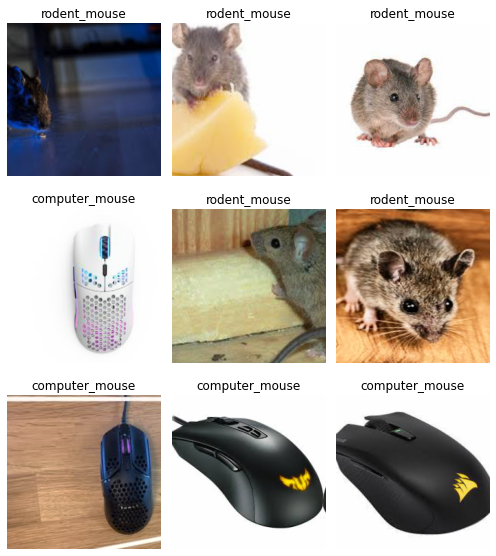

In [49]:
data.show_batch(rows=3, figsize=(7,8))

In [58]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['computer_mouse', 'rodent_mouse'], 2, 320, 80)

In [59]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [60]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.608055,0.001469,0.000000,02:01
1,0.306989,0.000036,0.000000,01:57
2,0.194216,0.000033,0.000000,01:56
3,0.138111,0.000046,0.000000,01:56


In [61]:
learn.save('stage-1')

In [62]:
learn.unfreeze()

In [63]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


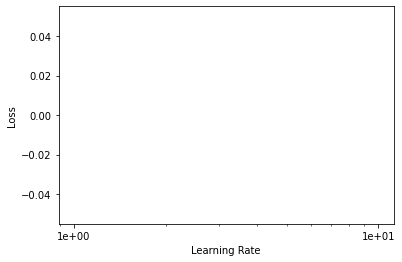

In [64]:
learn.recorder.plot()

In [65]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.013779,0.003118,0.000000,02:49
1,0.009038,0.000319,0.000000,02:46


In [66]:
learn.save('stage-2')

In [67]:
learn.load('stage-2');

In [68]:
interp = ClassificationInterpretation.from_learner(learn)

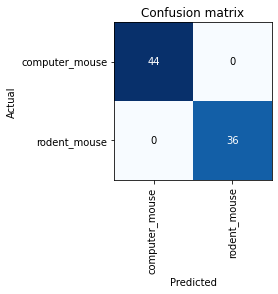

In [70]:
interp.plot_confusion_matrix()

In [71]:
from fastai.widgets import *

In [72]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [73]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [74]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [75]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [76]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [91]:
learn.export()

In [78]:
defaults.device = torch.device('cpu')

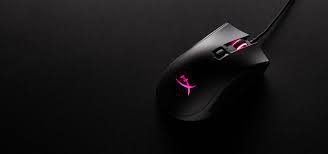

In [79]:
img = open_image(path/'computer_mouse'/'00000021.jpg')
img

In [80]:
learn = load_learner(path)

In [81]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'computer_mouse'

In [82]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [83]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,28.044641,85164224.000000,0.550000,01:57


In [84]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,7.703238,18578.253906,0.550000,01:56
1,7.638991,49.253719,0.437500,01:56
2,7.296352,21.456514,0.275000,01:59
3,7.411582,18.220514,0.275000,01:56
4,7.413414,10.853521,0.225000,01:56


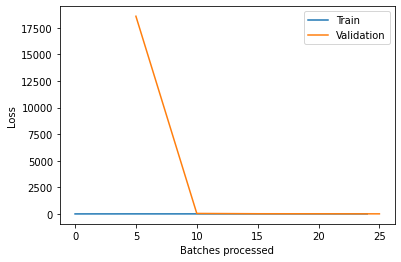

In [85]:
learn.recorder.plot_losses()

In [86]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [87]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.624402,1.994008,0.412500,02:46


In [88]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [89]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [90]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.697167,2.087594,0.819444,01:35
1,1.767136,1.843911,0.786111,01:41
2,1.712345,1.605793,0.736111,01:37
3,1.687238,1.333521,0.630556,01:36
4,1.594469,1.068789,0.538889,01:35
5,1.486348,0.781218,0.383333,01:36
6,1.331649,0.521878,0.255556,01:36
7,1.182728,0.333844,0.136111,01:41
8,1.049813,0.209378,0.075000,01:38
9,0.940167,0.134375,0.038889,01:36
